# Práctica: Tensores y sus Aplicaciones
En esta práctica, trabajaremos con tensores desde su matricización hasta su aplicación práctica para la compresión de datos.

### Objetivos
1. Entender cómo vectorizar y matriciar un tensor.
2. Construir tensores a partir de tensores de rango 1 usando el producto externo.
3. Implementar el modelo PARAFAC para descomposición tensorial.

## 1. Vectorización y Matricización de Tensores
Un tensor puede ser representado como un vector o como una matriz dependiendo del modo en que se matriciza. Exploraremos diferentes modos y cómo realizar estas transformaciones.

<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:50: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_12145/698501393.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax_3d.set_title("Tensor Original $\mathcal{X}$ (3D)")
/tmp/ipykernel_12145/698501393.py:50: SyntaxWarning: invalid escape sequence '\m'
  ax4.set_title("Vectorización $vec(\mathcal{X})$")


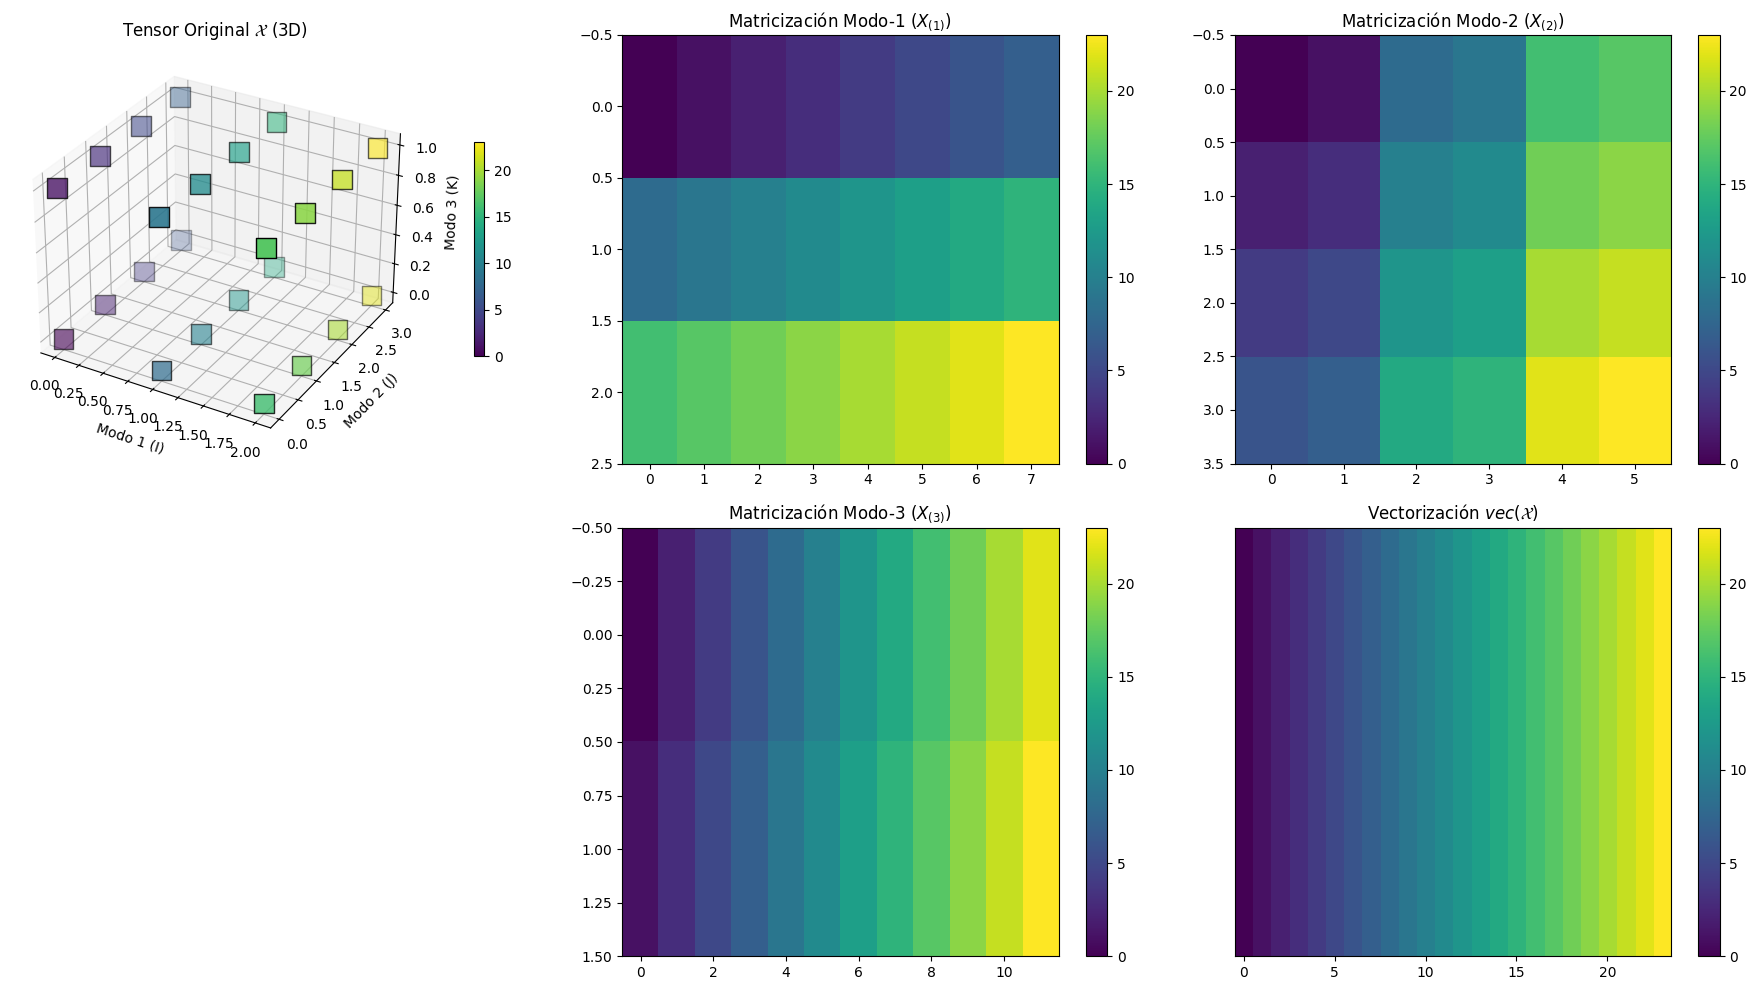

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Defino el tensor original (3x4x2)
tensor = np.arange(24).reshape(3, 4, 2)

# 2. Realizo las Matricizaciones (Unfoldings)
mode1 = np.reshape(np.moveaxis(tensor, 0, 0), (tensor.shape[0], -1))
mode2 = np.reshape(np.moveaxis(tensor, 1, 0), (tensor.shape[1], -1))
mode3 = np.reshape(np.moveaxis(tensor, 2, 0), (tensor.shape[2], -1))
vectorized = tensor.flatten()

# 3. Visualización Completa
fig = plt.figure(figsize=(18, 10))

# --- Representación 3D del Tensor Original ---
# Uso una cuadrícula para ubicar cada valor en el espacio 3D
ax_3d = fig.add_subplot(2, 3, 1, projection='3d')
i, j, k = np.indices(tensor.shape)
sc = ax_3d.scatter(i.flatten(), j.flatten(), k.flatten(), 
                   c=tensor.flatten(), cmap='viridis', s=200, marker='s', edgecolors='k')
ax_3d.set_title("Tensor Original $\mathcal{X}$ (3D)")
ax_3d.set_xlabel('Modo 1 (I)')
ax_3d.set_ylabel('Modo 2 (J)')
ax_3d.set_zlabel('Modo 3 (K)')
plt.colorbar(sc, ax=ax_3d, shrink=0.5, pad=0.1)

# --- Matricización Modo-1 ---
ax1 = fig.add_subplot(2, 3, 2)
im1 = ax1.imshow(mode1, aspect='auto', cmap='viridis')
ax1.set_title("Matricización Modo-1 ($X_{(1)}$)")
plt.colorbar(im1, ax=ax1)

# --- Matricización Modo-2 ---
ax2 = fig.add_subplot(2, 3, 3)
im2 = ax2.imshow(mode2, aspect='auto', cmap='viridis')
ax2.set_title("Matricización Modo-2 ($X_{(2)}$)")
plt.colorbar(im2, ax=ax2)

# --- Matricización Modo-3 ---
ax3 = fig.add_subplot(2, 3, 5)
im3 = ax3.imshow(mode3, aspect='auto', cmap='viridis')
ax3.set_title("Matricización Modo-3 ($X_{(3)}$)")
plt.colorbar(im3, ax=ax3)

# --- Vectorización ---
ax4 = fig.add_subplot(2, 3, 6)
im4 = ax4.imshow(vectorized.reshape(1, -1), aspect='auto', cmap='viridis')
ax4.set_title("Vectorización $vec(\mathcal{X})$")
ax4.set_yticks([])
plt.colorbar(im4, ax=ax4)

plt.tight_layout()
plt.show()

## 2. Construcción de Tensores a partir de Tensores de Rango 1
Un tensor de rango 1 se puede construir mediante el producto externo de vectores.

In [4]:
import numpy as np

# Producto externo para construir un tensor con valores enteros
# Definimos vectores con valores simples para identificar los productos
v1 = np.array([1, 2, 3])          # Tamaño I = 3
v2 = np.array([1, 10, 100, 1000]) # Tamaño J = 4
v3 = np.array([1, 5, 10, 15, 20]) # Tamaño K = 5

# Producto externo (v1 o v2 o v3)
# np.multiply.outer primero hace el producto de v1 y v2, 
# y el resultado lo opera con v3 para obtener el tensor 3D.
tensor_outer = np.multiply.outer(np.multiply.outer(v1, v2), v3)

print("\nTensor construido mediante producto externo:")
print(f"Forma del tensor: {tensor_outer.shape}") # Debería ser (3, 4, 5)
print(tensor_outer)


Tensor construido mediante producto externo:
Forma del tensor: (3, 4, 5)
[[[    1     5    10    15    20]
  [   10    50   100   150   200]
  [  100   500  1000  1500  2000]
  [ 1000  5000 10000 15000 20000]]

 [[    2    10    20    30    40]
  [   20   100   200   300   400]
  [  200  1000  2000  3000  4000]
  [ 2000 10000 20000 30000 40000]]

 [[    3    15    30    45    60]
  [   30   150   300   450   600]
  [  300  1500  3000  4500  6000]
  [ 3000 15000 30000 45000 60000]]]
